In [404]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [405]:
data = pd.read_csv("C:\\Users\\dhruv\\Downloads\\Housing.csv")

In [406]:
dft = data.drop(columns=['furnishingstatus'])
col = dft.columns

In [407]:
scaler = StandardScaler() 

In [408]:
#
#CREATING BIN_MAP FUNCTION
#
def bin_map(var):
    i = 0
    while(i < 545):
        if(var[i] == 'yes'):
            var[i] = 1
        if(var[i] == 'no'):
            var[i] = 0
        i = i + 1

In [409]:
#
#MAPPING 'YES' AND 'NO' TO '1'S' AND '0'S'
#
bin_map(dft.mainroad)
bin_map(dft.guestroom)
bin_map(dft.basement)
bin_map(dft.hotwaterheating)
bin_map(dft.airconditioning)
bin_map(dft.prefarea)

C:\Users\dhruv\AppData\Local\Temp\ipykernel_22080\3636318678.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var[i] = 1
C:\Users\dhruv\AppData\Local\Temp\ipykernel_22080\3636318678.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var[i] = 0


In [410]:
dft = scaler.fit_transform(dft)

In [411]:
Y = scaler.fit_transform(np.array(data.price).reshape(545,1))
Wye = pd.DataFrame(Y)

In [412]:
data = pd.DataFrame(dft,columns=col)
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,4.566365,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941
1,4.004484,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035
2,4.004484,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941
3,3.985755,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941
4,3.554979,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035
...,...,...,...,...,...,...,...,...,...,...,...,...
540,-1.576868,-0.991879,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,-0.554035
541,-1.605149,-1.268613,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035
542,-1.614327,-0.705921,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035
543,-1.614327,-1.033389,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035


In [413]:
Wye = pd.DataFrame(np.array(data.price))


In [414]:
Ex = data.drop(columns=['price'])


In [415]:
#d = pd.DataFrame(np.hstack([Ex,Wye]))

In [416]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(Ex)
principalDf = pd.DataFrame(data = principalComponents
 , columns = ['principal component 1', 'principal component 2'])

In [417]:
df1 = pd.DataFrame(np.hstack([principalDf,Wye]))

In [418]:
df1

,0,1,2
0,3.264248,-1.129485,4.566365
1,5.194952,-3.347516,4.004484
2,2.460935,1.278579,4.004484
3,3.625400,0.538743,3.985755
4,2.502535,1.070341,3.554979
...,...,...,...
540,-1.078671,1.444086,-1.576868
541,-2.533313,-0.848245,-1.605149
542,-2.063004,0.305558,-1.614327
543,-2.441185,-0.810540,-1.614327


In [497]:
train1=df1.sample(frac=0.8,random_state=1) 
test1=df1.drop(train1.index)

In [499]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)

In [509]:
train1ex = np.array(train1.drop(columns=[2])).reshape(436,2)

In [510]:
train1wye = np.array(train1.drop(columns=[0,1])).reshape(436,1).ravel()

In [511]:
test1ex = np.array(test1.drop(columns=[2])).reshape(109,2)

In [512]:
test1wye = np.array(test1.drop(columns=[0,1])).reshape(109,1)

In [513]:
model = svr_rbf.fit(train1ex,train1wye)

In [514]:
prediction1 = model.predict(test1ex)
prediction1.reshape(109, 1)

array([[ 1.19151924e+00],
       [ 3.30102310e+00],
       [ 1.39622186e+00],
       [ 3.93459752e-01],
       [ 3.36186921e-01],
       [ 4.36029068e+00],
       [ 2.58189216e+00],
       [ 1.96121431e+00],
       [ 1.38799113e+00],
       [ 5.98075163e-01],
       [ 1.53558191e+00],
       [ 4.23350039e-01],
       [ 1.23999285e+00],
       [ 6.28406224e-01],
       [-2.84284115e-01],
       [-9.25794346e-02],
       [ 1.13813357e+00],
       [ 1.14881210e+00],
       [ 9.57050121e-01],
       [ 2.11094127e-01],
       [-4.59462076e-01],
       [ 4.89055118e-01],
       [ 9.88438638e-01],
       [ 2.26987599e-01],
       [ 1.18487895e+00],
       [ 1.17244703e+00],
       [ 1.39474671e+00],
       [ 2.28369243e-01],
       [ 7.05032576e-01],
       [ 4.05263991e-01],
       [ 9.53412617e-01],
       [ 2.67012193e-01],
       [ 3.18465224e-01],
       [ 3.63766240e-01],
       [ 8.22664454e-01],
       [-1.23963110e-01],
       [ 8.78462158e-01],
       [ 1.28957501e+00],
       [-1.3

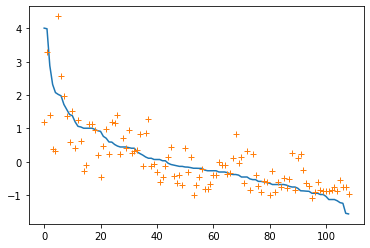

In [515]:
plt.plot(test1wye)
plt.plot(prediction1,'+')

In [516]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(test1wye, prediction1), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(test1wye, prediction1), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(test1wye, prediction1), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(test1wye, prediction1), 2)) 
print("R2 score =", round(sm.r2_score(test1wye, prediction1), 2))

Mean absolute error = 0.47
Mean squared error = 0.45
Median absolute error = 0.33
Explain variance score = 0.56
R2 score = 0.56


In [429]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(Ex)
principalDf = pd.DataFrame(data = principalComponents
 , columns = ['principal component 1', 'principal component 2','principal component 3', 'principal component 4','principal component 5', 'principal component 6'])

df2 = pd.DataFrame(np.hstack([principalDf,Wye]))


In [430]:
train2=df2.sample(frac=0.8,random_state=1) 
test2=df2.drop(train2.index)

from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
train2

,0,1,2,3,4,5,6
62,1.668434,-1.577144,-0.350531,-0.284510,-0.738116,-0.047705,1.232537
247,2.043753,-1.676954,-1.799614,0.760626,-0.463055,0.400701,-0.115977
142,1.691797,-1.073583,-0.967244,0.813824,-0.525831,0.919381,0.445904
107,0.706713,0.801670,0.287002,-0.536019,1.818314,1.209268,0.726844
483,-0.640626,-0.483671,-0.736872,-0.194905,0.549685,-0.005113,-0.977528
...,...,...,...,...,...,...,...
359,-1.203946,-0.065272,-0.719406,0.272859,-0.190551,0.152505,-0.565482
36,1.669630,-1.038315,-0.498018,3.720000,2.610809,0.056067,1.753214
30,2.528118,-2.072387,-1.250339,-0.374623,-0.620325,-0.739087,1.944253
20,0.044159,0.059643,0.115610,4.398738,0.810404,-1.162575,2.131547


In [431]:
train2ex = np.array(train2.drop(columns=[6])).reshape(436,6)

In [432]:
train2wye = np.array(train2.drop(columns=[0,1,2,3,4,5])).reshape(436,1).ravel()

In [433]:
test2ex = np.array(test2.drop(columns=[6])).reshape(109,6)

In [434]:
test2wye = np.array(test2.drop(columns=[0,1,2,3,4,5])).reshape(109,1)

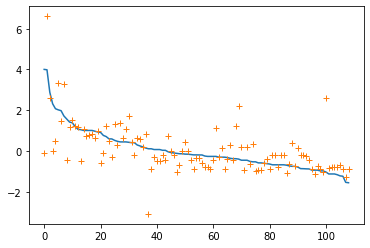

In [494]:
model = svr_rbf.fit(train2ex,train2wye)

prediction2 = model.predict(test2ex)
prediction2.reshape(109, 1)

plt.plot(test2wye)
plt.plot(prediction2,'+')

In [495]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(test2wye, prediction), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(test2wye, prediction), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(test2wye, prediction), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(test2wye, prediction), 2)) 
print("R2 score =", round(sm.r2_score(test2wye, prediction), 2))

Mean absolute error = 0.63
Mean squared error = 0.94
Median absolute error = 0.44
Explain variance score = 0.1
R2 score = 0.09


In [437]:
from sklearn.decomposition import PCA
pca = PCA(n_components=11)
principalComponents = pca.fit_transform(Ex)
principalDf = pd.DataFrame(data = principalComponents
 , columns = ['principal component 1', 'principal component 2','principal component 3',
              'principal component 4','principal component 5', 'principal component 6',
             'principal component 7','principal component 8','principal component 9',
              'principal component 10','principal component 11'])
#,'principal component 9','principal component 10','principal component 11'

df3 = pd.DataFrame(np.hstack([principalDf,Wye]))


In [438]:
train3=df3.sample(frac=0.8,random_state=1) 
test3=df3.drop(train3.index)

from sklearn.svm import SVR
svr_rbf = SVR(kernel='linear', C=1e3, gamma=0.1)
train3

,0,1,2,3,4,5,6,7,8,9,10,11
62,1.668434,-1.577144,-0.350531,-0.284510,-0.738116,-0.047705,-0.121506,-0.160084,0.522901,0.678605,-1.033756,1.232537
247,2.043753,-1.676954,-1.799614,0.760626,-0.463055,0.400701,-0.852142,-0.194329,-2.276169,-0.701348,1.500006,-0.115977
142,1.691797,-1.073583,-0.967244,0.813824,-0.525831,0.919381,-1.288370,1.552603,0.030389,1.088125,-0.051945,0.445904
107,0.706713,0.801670,0.287002,-0.536019,1.818314,1.209268,0.212905,-0.145298,-0.293530,0.394505,1.622250,0.726844
483,-0.640626,-0.483671,-0.736872,-0.194905,0.549685,-0.005113,-0.635587,0.720711,-0.405571,0.746588,0.217113,-0.977528
...,...,...,...,...,...,...,...,...,...,...,...,...
359,-1.203946,-0.065272,-0.719406,0.272859,-0.190551,0.152505,-0.658521,-0.470938,-0.347374,-0.178396,-0.807956,-0.565482
36,1.669630,-1.038315,-0.498018,3.720000,2.610809,0.056067,1.965541,0.918476,0.903971,-0.430595,0.405776,1.753214
30,2.528118,-2.072387,-1.250339,-0.374623,-0.620325,-0.739087,0.054959,-0.117463,0.502399,-0.585040,1.183018,1.944253
20,0.044159,0.059643,0.115610,4.398738,0.810404,-1.162575,1.328682,-1.589544,-0.499869,0.278410,0.796768,2.131547


In [439]:
train3ex = np.array(train3.drop(columns=[11])).reshape(436,11)

In [440]:
train3wye = np.array(train3.drop(columns=[0,1,2,3,4,5,6,7,8,9,10])).reshape(436,1).ravel()

In [441]:
test3ex = np.array(test3.drop(columns=[11])).reshape(109,11)

In [442]:
test3wye = np.array(test3.drop(columns=[0,1,2,3,4,5,6,7,8,9,10])).reshape(109,1)

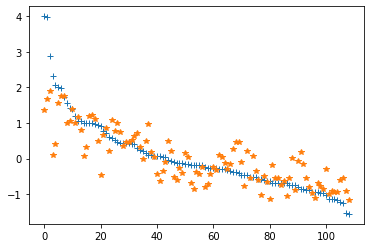

In [443]:
model = svr_rbf.fit(train3ex,train3wye)

prediction3 = model.predict(test3ex)
prediction3.reshape(109, 1)

plt.plot(test3wye,'+')
plt.plot(prediction3, '*')

In [444]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(test3wye, prediction3), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(test3wye, prediction3), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(test3wye, prediction3), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(test3wye, prediction3), 2)) 
print("R2 score =", round(sm.r2_score(test3wye, prediction3), 2))

Mean absolute error = 0.41
Mean squared error = 0.37
Median absolute error = 0.28
Explain variance score = 0.65
R2 score = 0.64


In [445]:
#lin Regression
from sklearn.linear_model import LinearRegression

model= LinearRegression()
model

datalin = pd.DataFrame(np.hstack([Ex,Wye]))
datalin

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941,4.566365
1,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035,4.004484
2,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941,4.004484
3,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941,3.985755
4,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035,3.554979
...,...,...,...,...,...,...,...,...,...,...,...,...
540,-0.991879,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,-0.554035,-1.576868
541,-1.268613,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,-1.605149
542,-0.705921,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,-1.614327
543,-1.033389,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,-1.614327


In [446]:
train_lin=datalin.sample(frac=0.8,random_state=1) 
test_lin=datalin.drop(train_lin.index)
test_lin.shape

(109, 12)

In [447]:
testlinY = test_lin.drop(columns=[0,1,2,3,4,5,6,7,8,9,10])

In [448]:
model.fit(train_lin.drop(columns=[11]),train_lin.drop(columns=[0,1,2,3,4,5,6,7,8,9,10]))

LinearRegression()

In [452]:
pred = model.predict(test_lin.drop(columns=[11]))

In [493]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(testlinY, pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(testlinY, pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(testlinY, pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(testlinY, pred), 2)) 
print("R2 score =", round(sm.r2_score(testlinY, pred), 2))

Mean absolute error = 0.44
Mean squared error = 0.38
Median absolute error = 0.33
Explain variance score = 0.63
R2 score = 0.63
